In [1]:
from ObjectiveFunction import ObjectiveFunction
from EvolutionaryStrategy import EvolutionaryStrategy
import numpy as np
import json
import matplotlib.pyplot as plt

# Schwefel Function

In [2]:
def plot_fitness_performance_per_run(run_num, avg_fitness_per_run, best_fitness_per_run):
    plt.plot(range(1, run_num + 1), avg_fitness_per_run, label='Average Fitness', color='blue')
    plt.plot(range(1, run_num + 1), best_fitness_per_run, label='best Fitness', color='green')        
    plt.xlabel('Run')
    plt.ylabel('Fitness')
    plt.title('Per Run')
    plt.legend()
    plt.show()

In [3]:
def run_es(config, run_num = 1):
    avg_fitness_per_run = []
    best_fitness_per_run = []
    min_fitness_per_run = []
    for i in range(0,run_num):
        print("-----------------------------------------------------")
        print("this is run number: ",i+1)
        es = EvolutionaryStrategy(config)
        min_value, min_chromosome, last_generation, average_fitness_values, best_fitness_values, fitness_std = es.run()
        print("solution fitness: ", min_value)
        print("solution fitness: ", min_chromosome)
        es.plot_fitness_performance(last_generation, average_fitness_values, best_fitness_values)
        es.plot_diversity(fitness_std,last_generation)
        avg_fitness_per_run.append(np.mean(average_fitness_values))
        best_fitness_per_run.append(np.mean(best_fitness_values))
    plot_fitness_performance_per_run(run_num, avg_fitness_per_run, best_fitness_per_run)

### n = 3

-----------------------------------------------------
this is run number:  1
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874529792905, 420.9687468679023, 420.96874597297386]


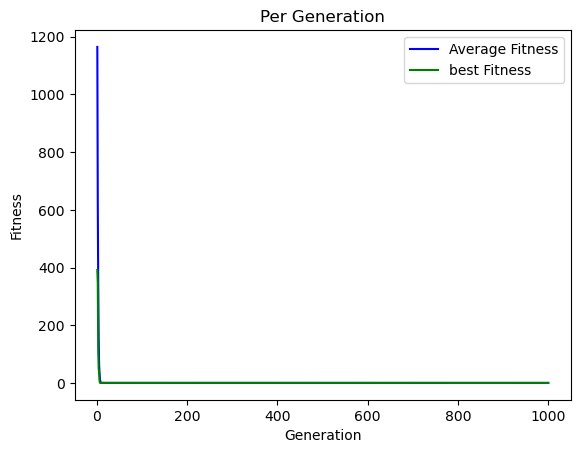

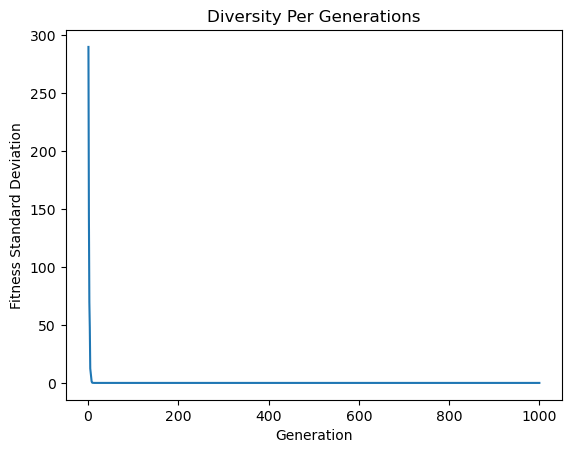

-----------------------------------------------------
this is run number:  2
solution fitness:  3.818269851763034e-05
solution fitness:  [420.96874643277636, 420.9687462828551, 420.96874610166884]


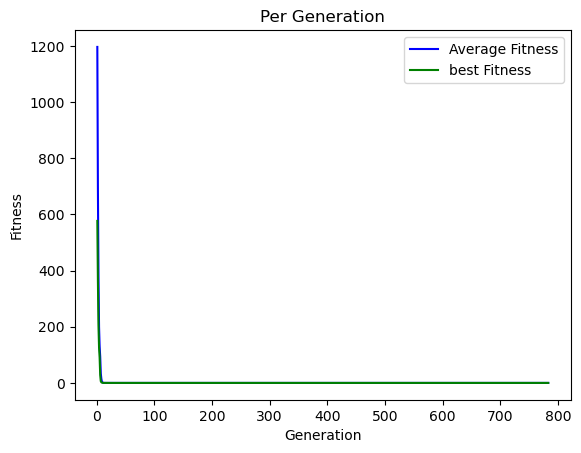

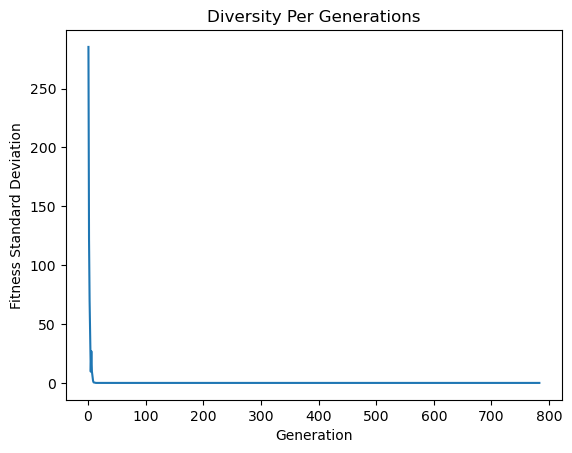

-----------------------------------------------------
this is run number:  3
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874729242677, 420.9687461374359, 420.96874648841373]


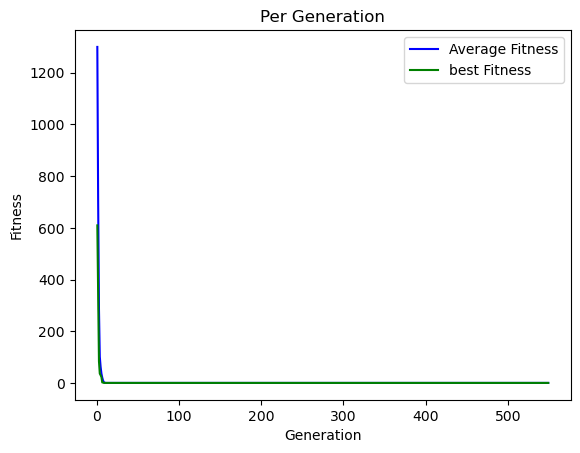

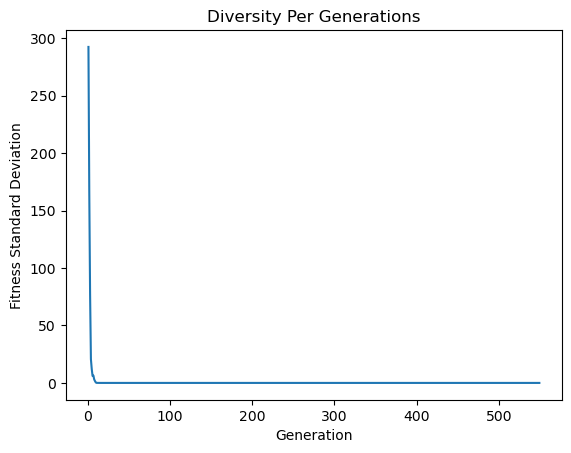

-----------------------------------------------------
this is run number:  4
solution fitness:  118.43837279713671
solution fitness:  [-302.5249353157365, 420.96874756660605, 420.9687467781152]


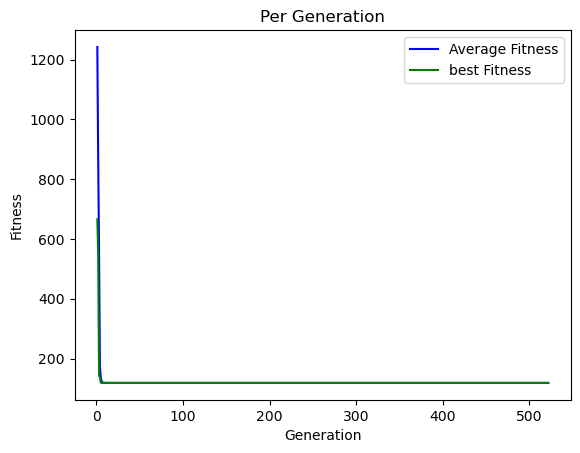

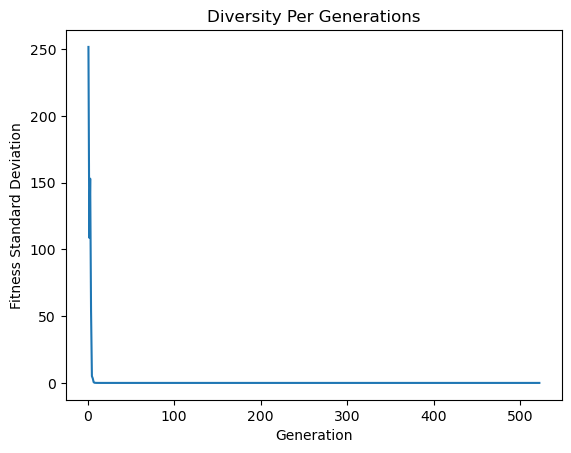

-----------------------------------------------------
this is run number:  5
solution fitness:  3.818269851763034e-05
solution fitness:  [420.9687465147697, 420.9687460455969, 420.9687463254465]


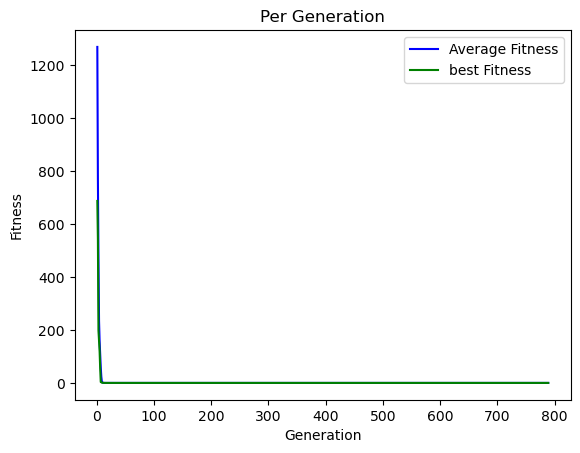

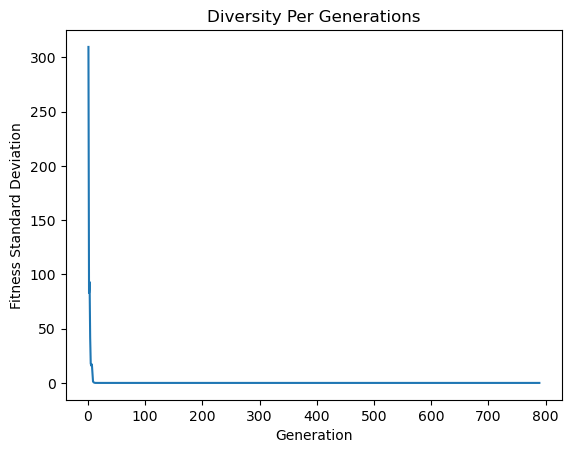

-----------------------------------------------------
this is run number:  6
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874648929935, 420.9687462950888, 420.9687454892839]


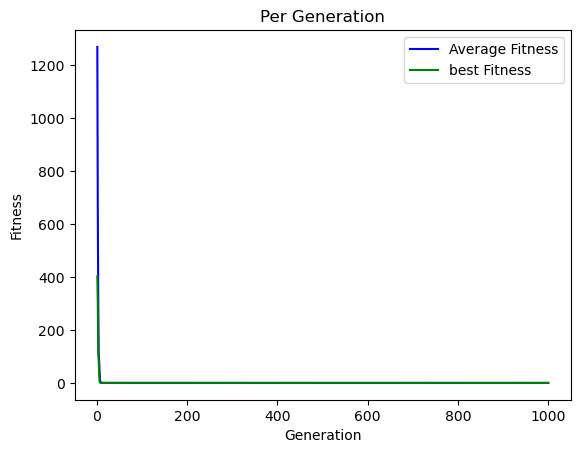

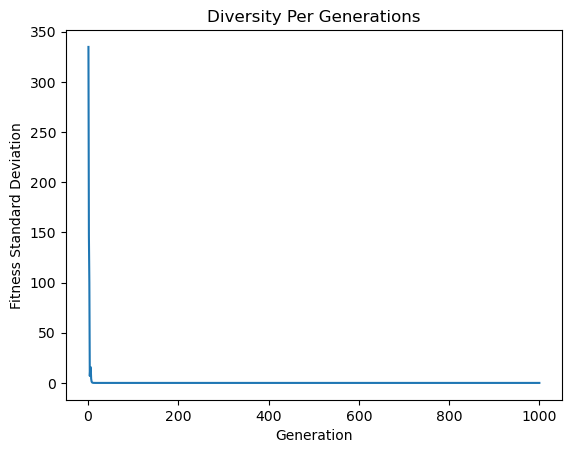

-----------------------------------------------------
this is run number:  7
solution fitness:  3.818269874500402e-05
solution fitness:  [420.9687456620425, 420.9687469584018, 420.96874646494047]


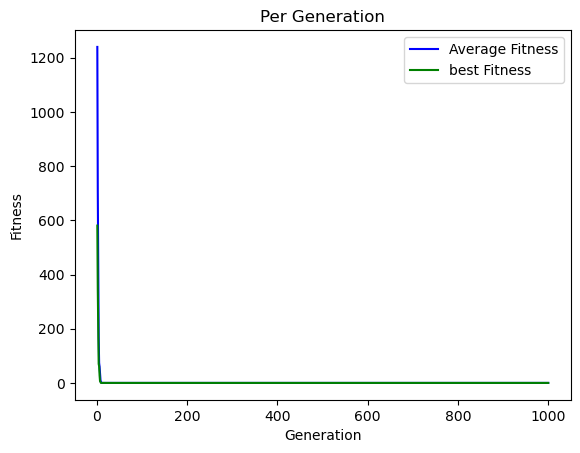

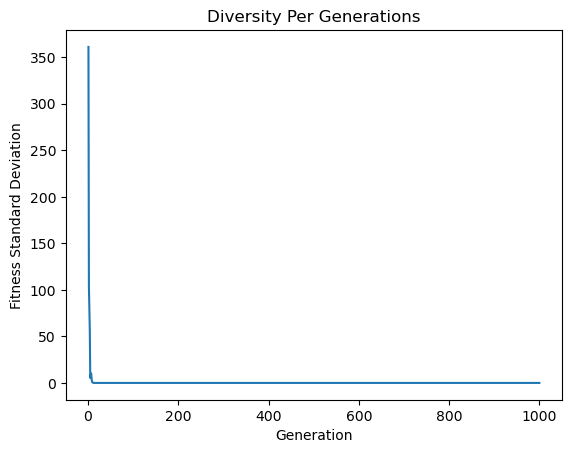

-----------------------------------------------------
this is run number:  8
solution fitness:  3.818269874500402e-05
solution fitness:  [420.9687477631772, 420.9687465809976, 420.9687469734386]


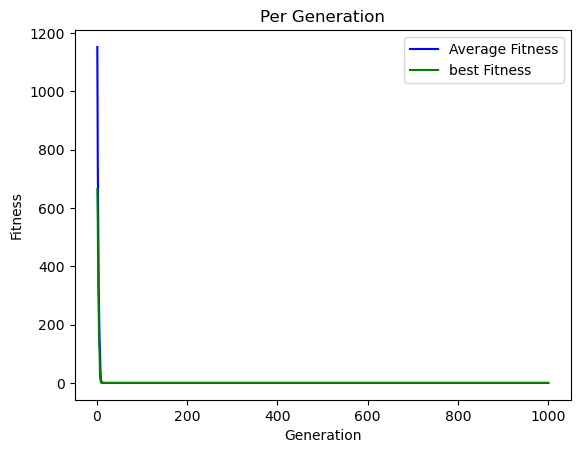

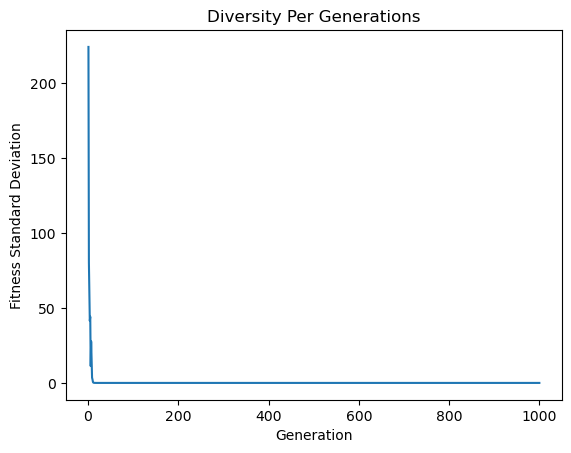

-----------------------------------------------------
this is run number:  9
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874622082714, 420.9687458761523, 420.9687464855827]


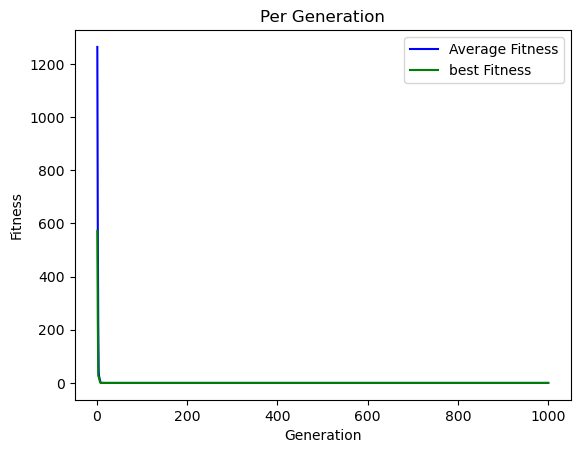

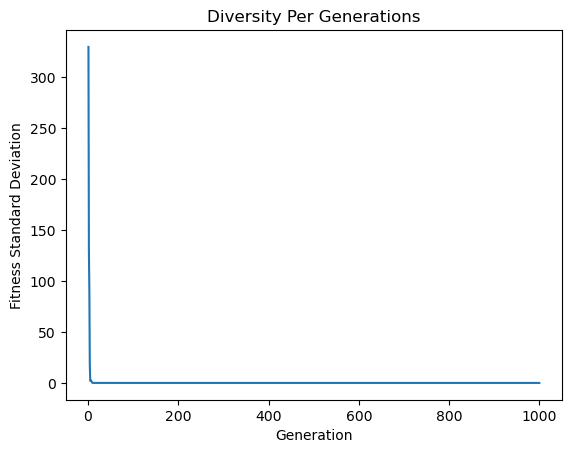

-----------------------------------------------------
this is run number:  10
solution fitness:  118.43837279713671
solution fitness:  [420.96874530968483, 420.96874655404935, -302.524934907578]


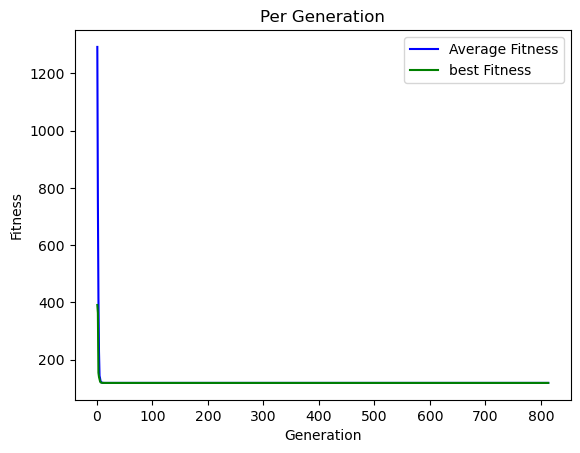

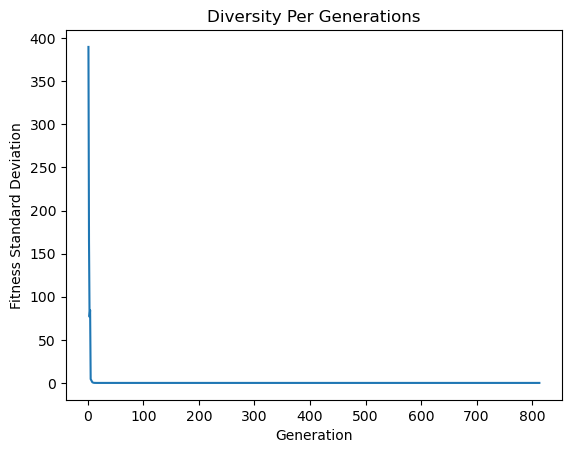

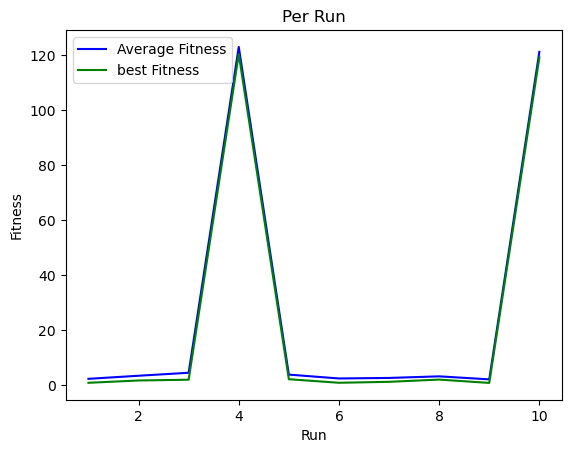

In [13]:
with open("configs/schwefel/3_adaptive_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

### n = 6

-----------------------------------------------------
this is run number:  1
solution fitness:  7.636539839950274e-05
solution fitness:  [420.9687469572163, 420.968745679981, 420.9687485098792, 420.9687452802133, 420.9687456917181, 420.9687461670052]


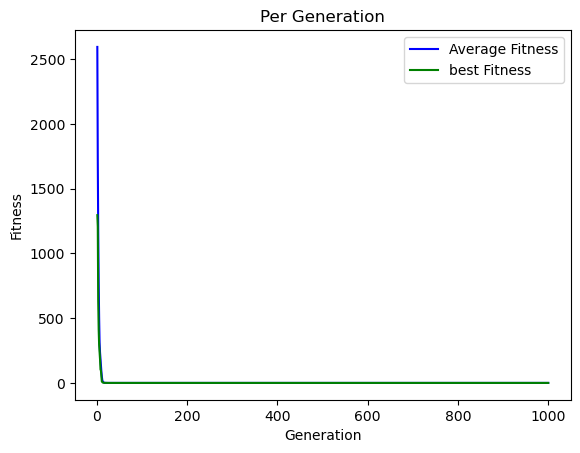

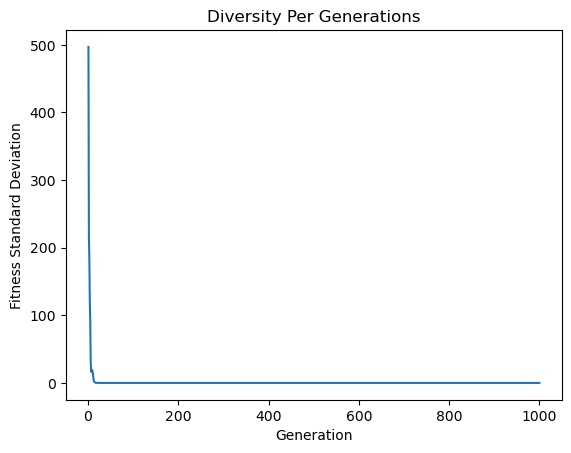

-----------------------------------------------------
this is run number:  2
solution fitness:  7.636539885425009e-05
solution fitness:  [420.96874785268096, 420.96874484491013, 420.9687453712451, 420.9687464744584, 420.9687479347993, 420.96874701460587]


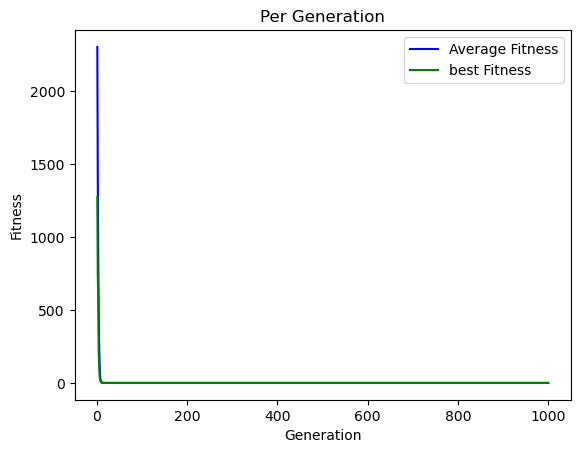

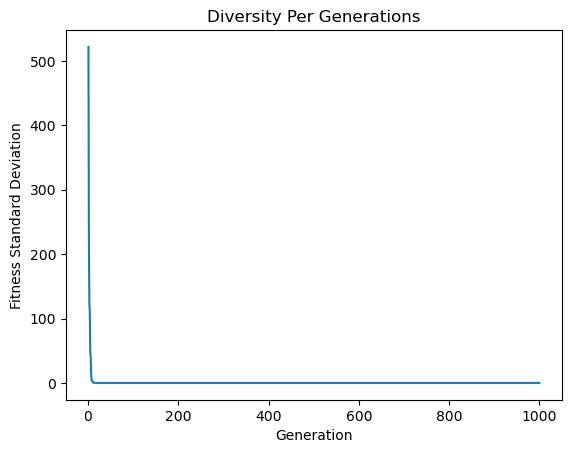

-----------------------------------------------------
this is run number:  3
solution fitness:  118.43841097983704
solution fitness:  [420.968749396461, -302.5249357801938, 420.96874540879884, 420.9687459361589, 420.96874583328724, 420.9687483042489]


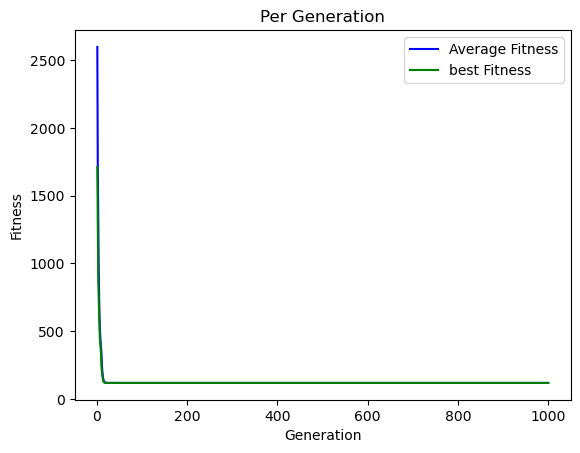

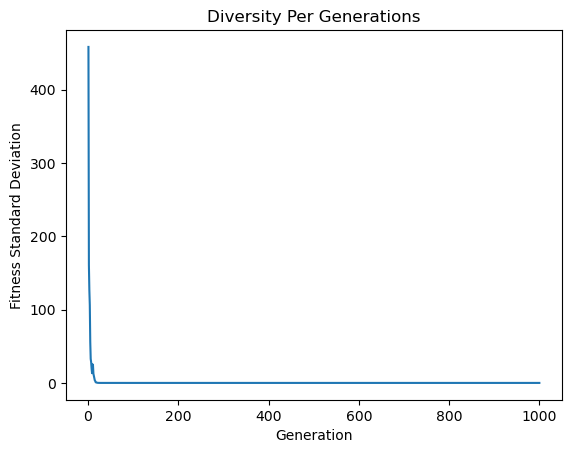

-----------------------------------------------------
this is run number:  4
solution fitness:  7.636539839950274e-05
solution fitness:  [420.9687451657988, 420.9687454013678, 420.96874460572377, 420.9687472809411, 420.96874614521863, 420.9687459045696]


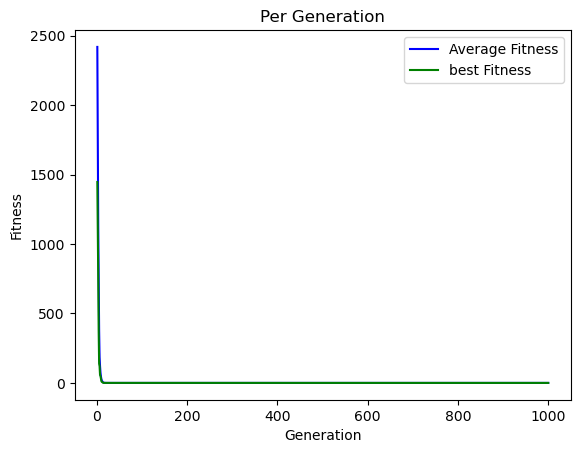

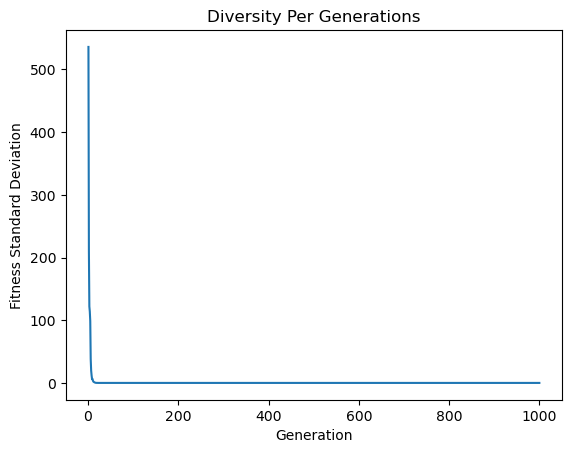

-----------------------------------------------------
this is run number:  5
solution fitness:  118.43841097983659
solution fitness:  [420.9687475618536, 420.968744366672, 420.9687443397653, 420.968745790268, -302.5249368474862, 420.9687472313551]


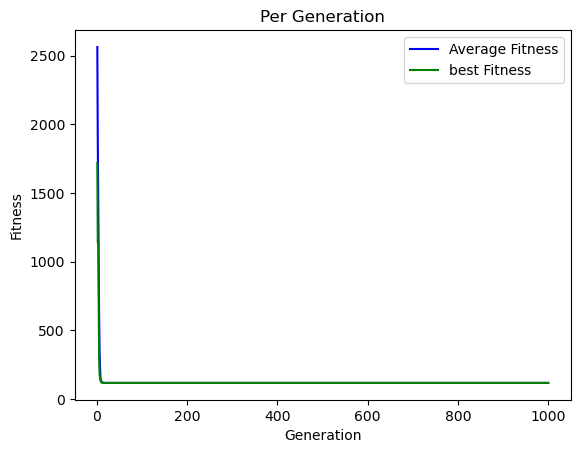

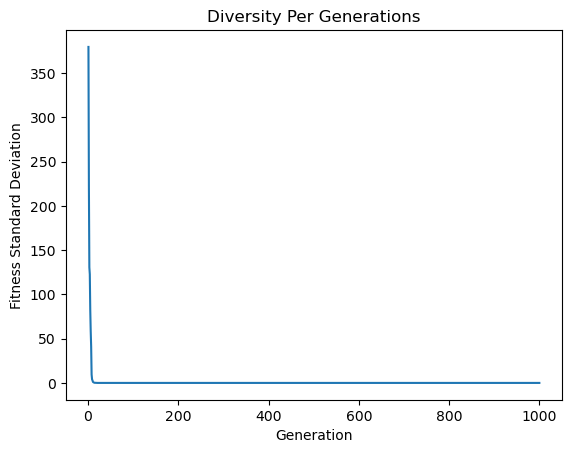

-----------------------------------------------------
this is run number:  6
solution fitness:  236.87674559427478
solution fitness:  [420.9687463051883, 420.9687446652784, -302.5249332822057, 420.96874509224597, 420.96874531537514, -302.5249340779507]


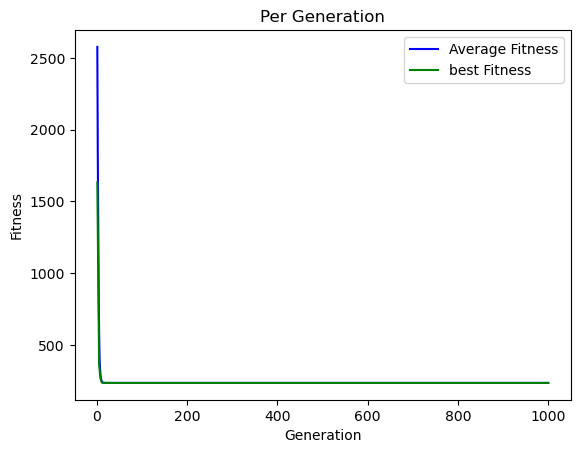

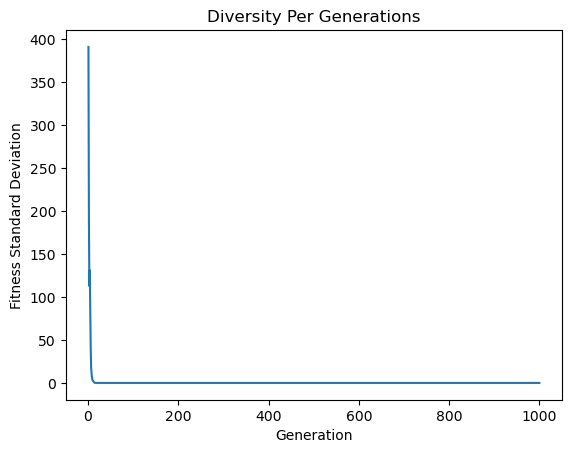

-----------------------------------------------------
this is run number:  7
solution fitness:  7.636539794475539e-05
solution fitness:  [420.9687461279203, 420.96874754841076, 420.9687473608626, 420.96874580023996, 420.9687460959062, 420.96874548669143]


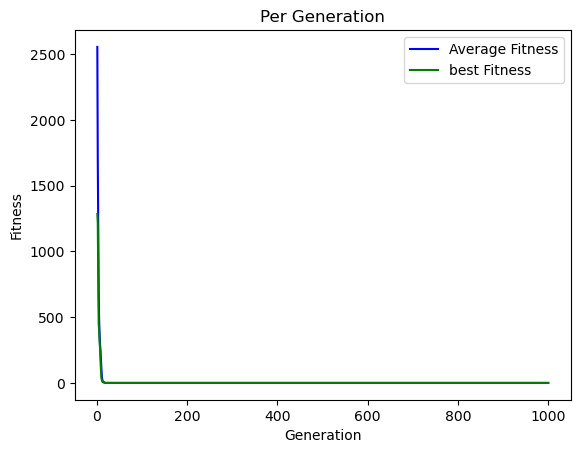

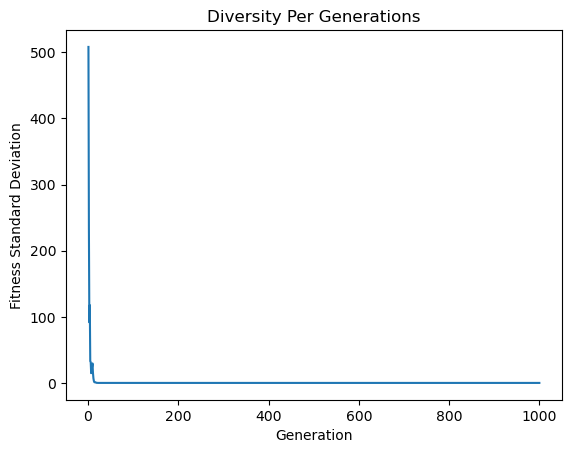

-----------------------------------------------------
this is run number:  8
solution fitness:  118.43841097983659
solution fitness:  [-302.524934575894, 420.9687464446814, 420.96874508769366, 420.9687472078417, 420.9687440551753, 420.96874718239854]


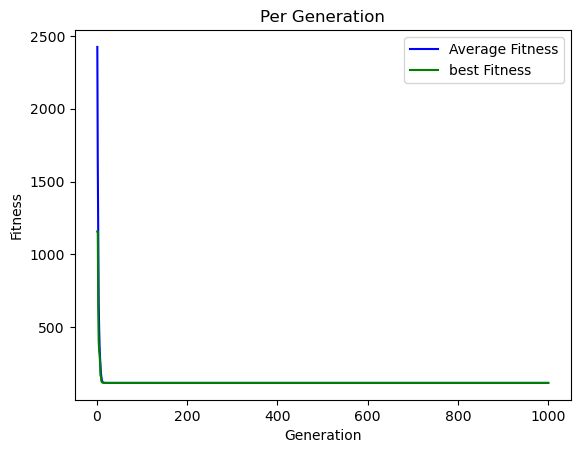

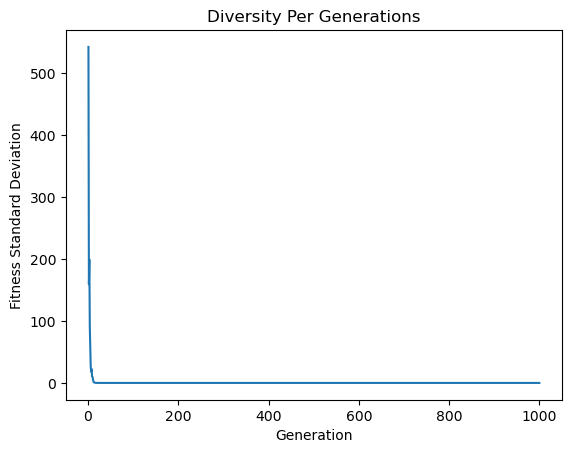

-----------------------------------------------------
this is run number:  9
solution fitness:  7.636539749000804e-05
solution fitness:  [420.96874612052335, 420.9687463539495, 420.9687456863801, 420.96874515412077, 420.9687465987174, 420.9687454517384]


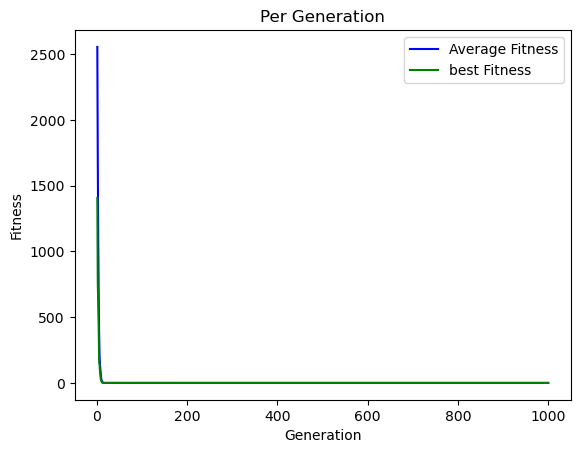

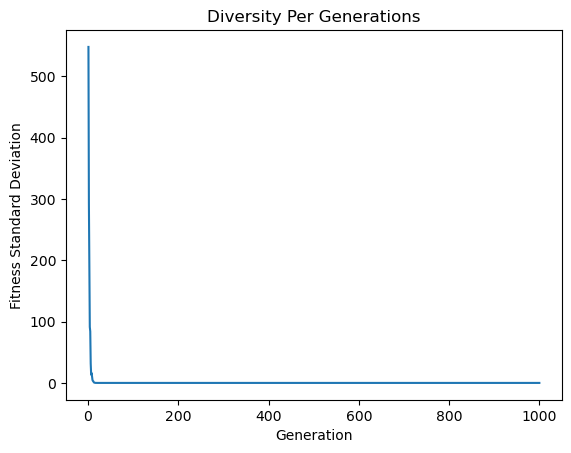

-----------------------------------------------------
this is run number:  10
solution fitness:  355.3150802087125
solution fitness:  [420.9687480662929, -302.52493399530704, 420.9687475330882, 420.96874662486914, -302.52493607092697, -302.5249348177813]


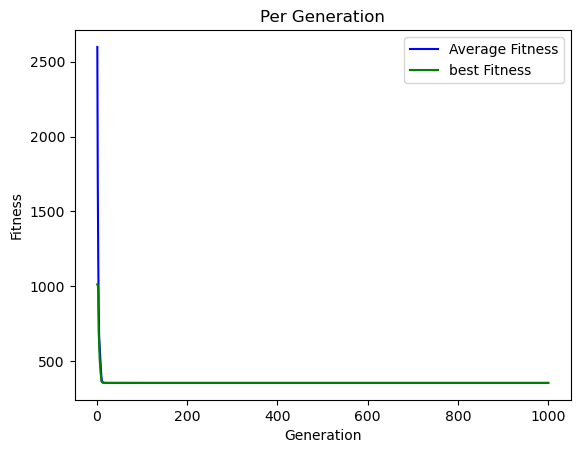

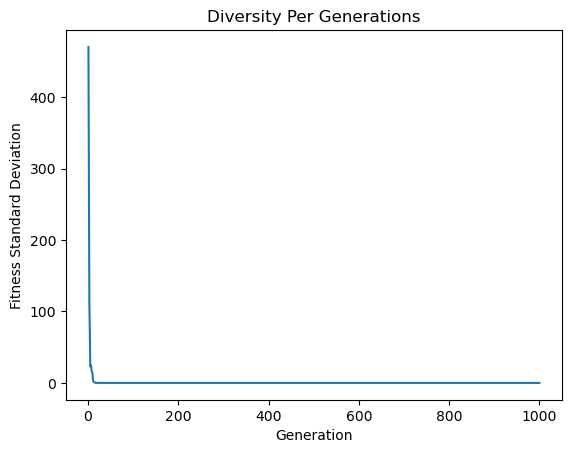

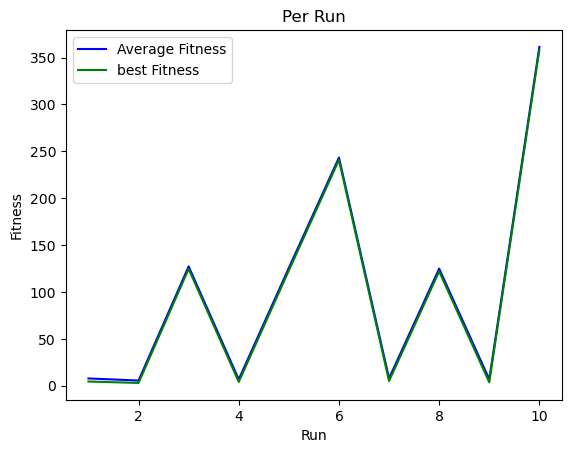

In [14]:
with open("configs/schwefel/6_adaptive_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

# generational

-----------------------------------------------------
this is run number:  1
solution fitness:  236.87674559428615
solution fitness:  [420.9687423920571, -302.52493916248727, 420.96875275901476, 420.96875149323523, 420.9687448434463, -302.52493729957774]


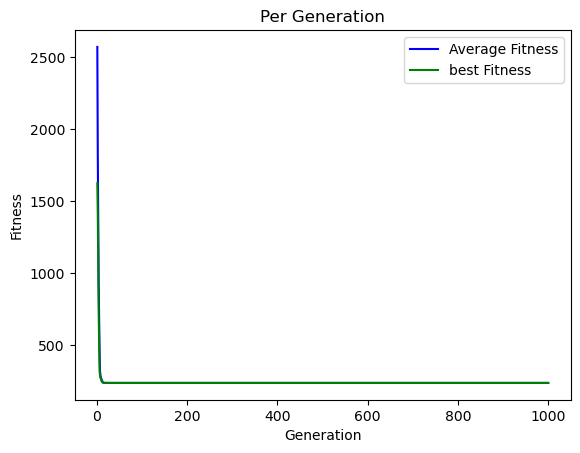

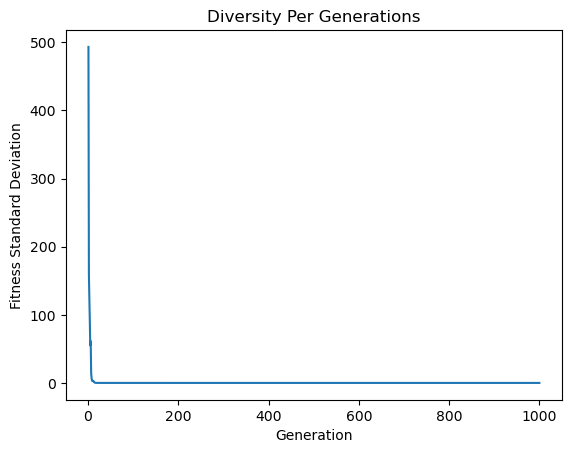

-----------------------------------------------------
this is run number:  2
solution fitness:  7.636543614353286e-05
solution fitness:  [420.96874896075946, 420.96875290707555, 420.9687357053991, 420.96875086655933, 420.9687459057791, 420.96875745261303]


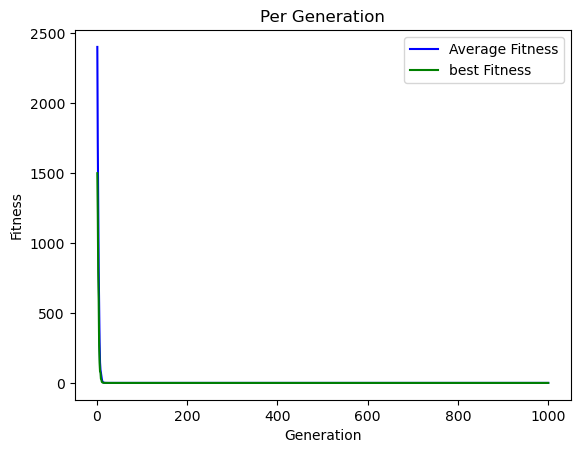

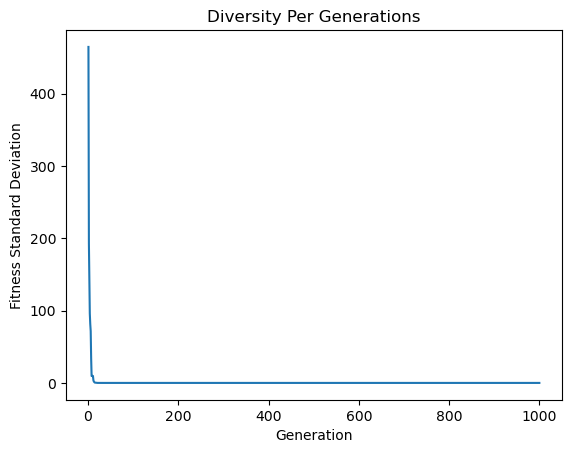

-----------------------------------------------------
this is run number:  3
solution fitness:  118.43841097988752
solution fitness:  [420.96873210963736, 420.96873672036696, -302.52492715385745, 420.96874913137424, 420.9687429817492, 420.96875125461634]


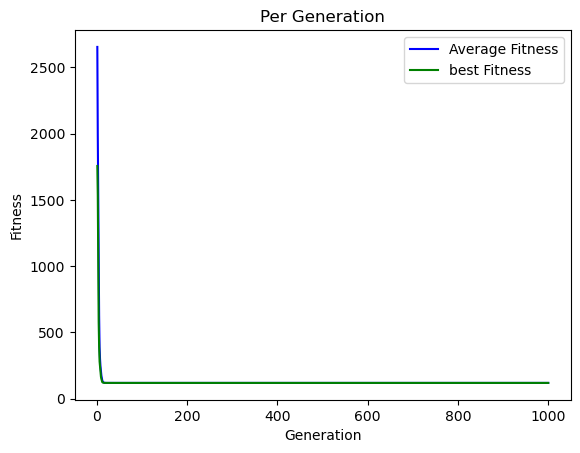

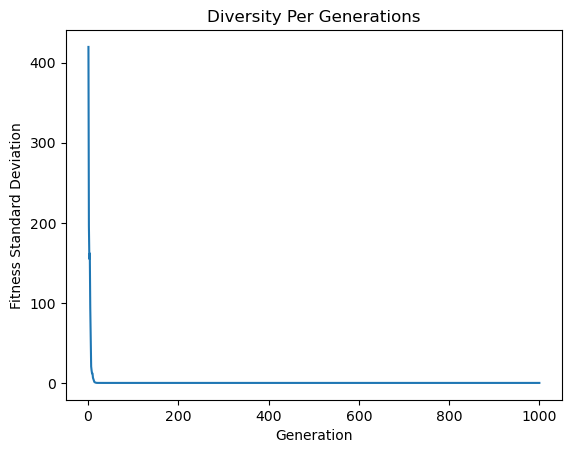

-----------------------------------------------------
this is run number:  4
solution fitness:  7.63654061302077e-05
solution fitness:  [420.968750991438, 420.9687461652578, 420.9687491176232, 420.9687471163525, 420.96874049876163, 420.96874867284026]


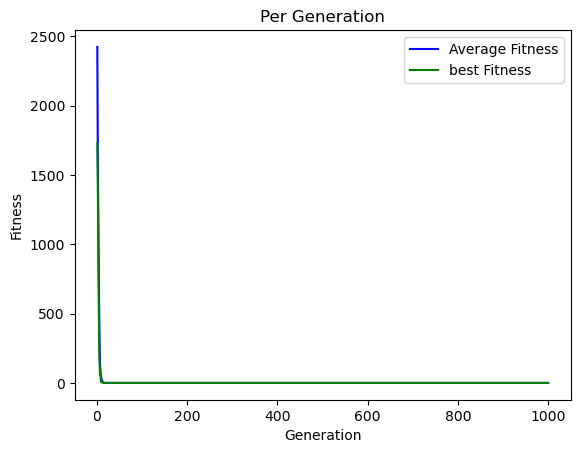

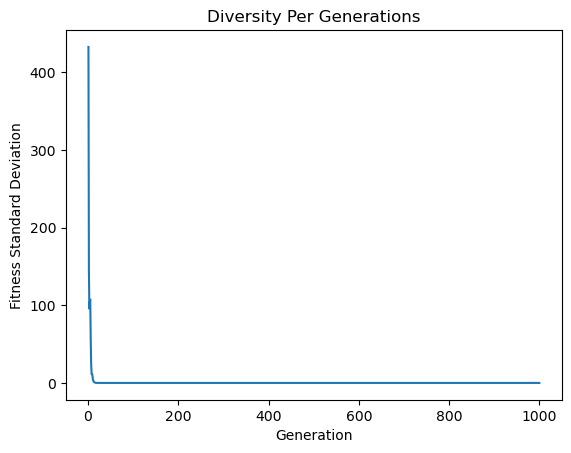

-----------------------------------------------------
this is run number:  5
solution fitness:  7.636540976818651e-05
solution fitness:  [420.9687405535065, 420.9687477960086, 420.9687495219327, 420.968751298003, 420.96874201213006, 420.96874370707707]


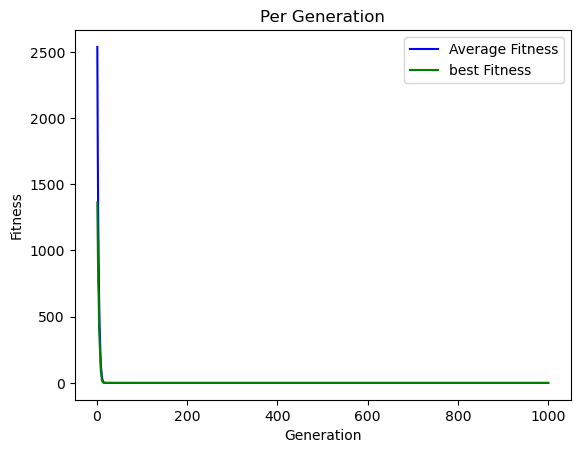

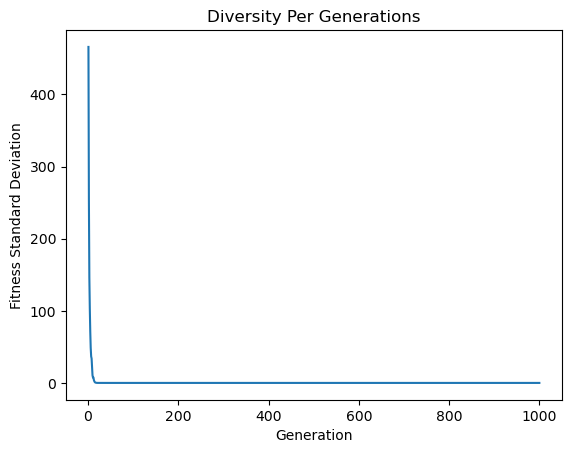

-----------------------------------------------------
this is run number:  6
solution fitness:  118.4384109798716
solution fitness:  [420.9687499386599, 420.9687502632584, -302.52492510759106, 420.96875227609405, 420.9687564622193, 420.96874298862247]


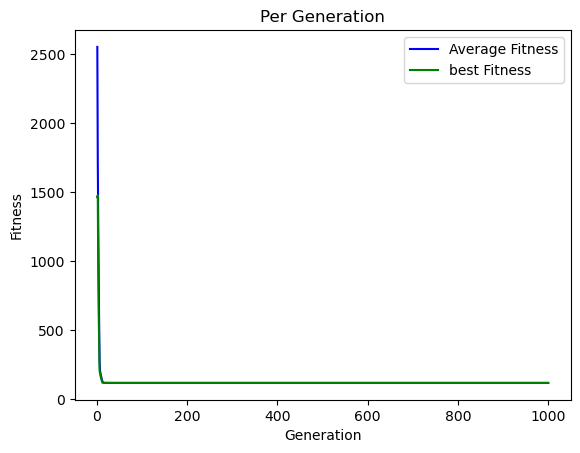

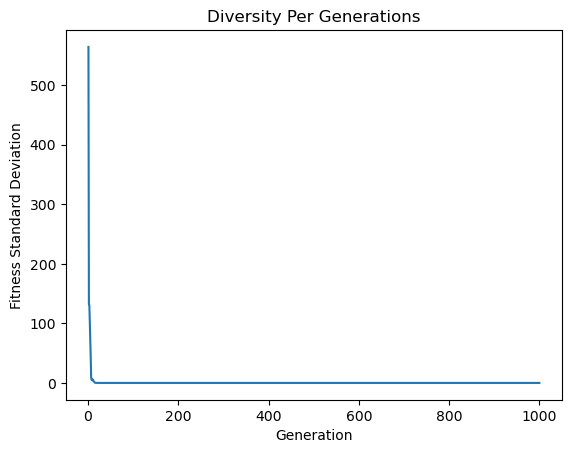

-----------------------------------------------------
this is run number:  7
solution fitness:  7.636542295585969e-05
solution fitness:  [420.9687414832567, 420.96873896657337, 420.9687424302307, 420.9687561966364, 420.9687433539294, 420.96874576531724]


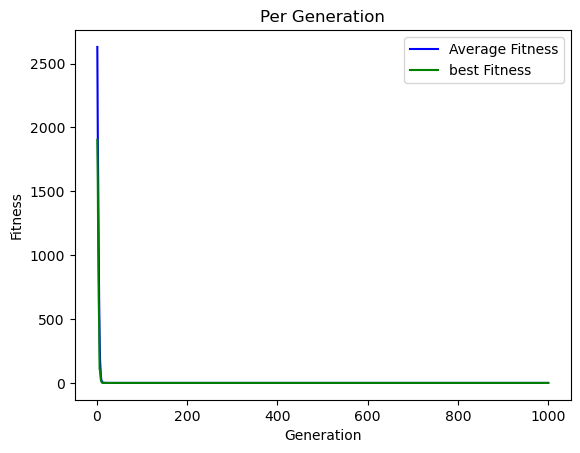

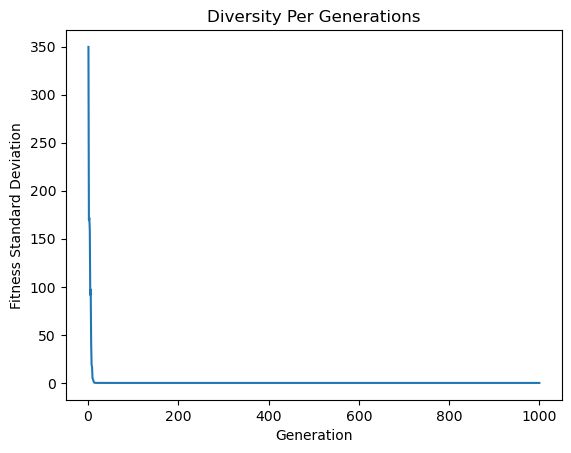

-----------------------------------------------------
this is run number:  8
solution fitness:  118.4384109798666
solution fitness:  [420.96874978811906, 420.9687412234797, 420.9687378798184, 420.96874601727836, -302.52494644549654, 420.9687419262222]


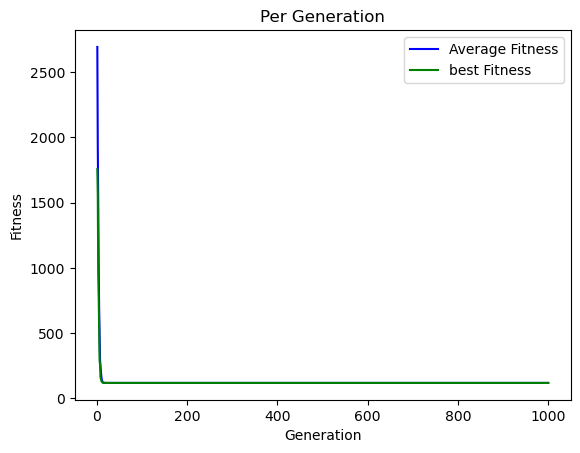

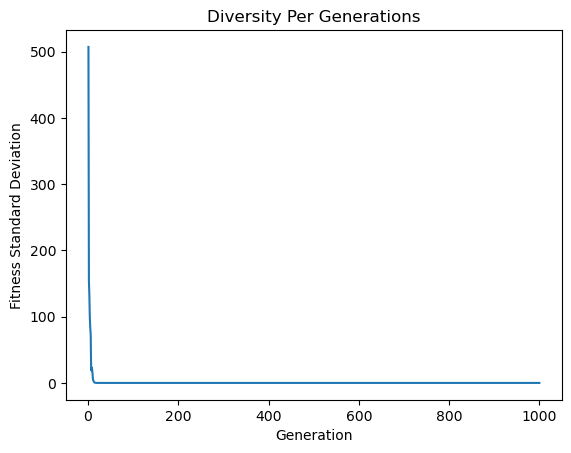

-----------------------------------------------------
this is run number:  9
solution fitness:  7.636542659383849e-05
solution fitness:  [420.9687502655021, 420.96874033034186, 420.96874765257024, 420.96873322374853, 420.9687457059038, 420.9687477812131]


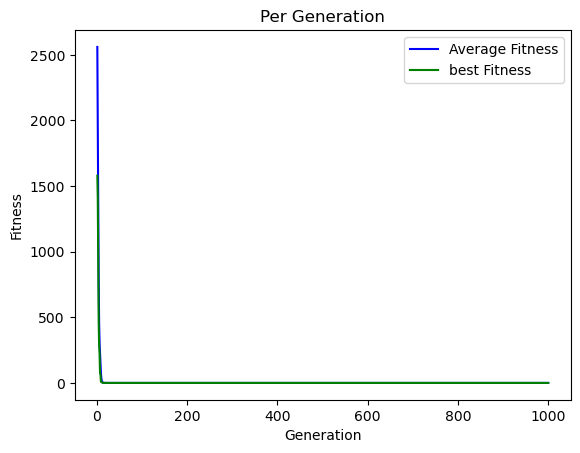

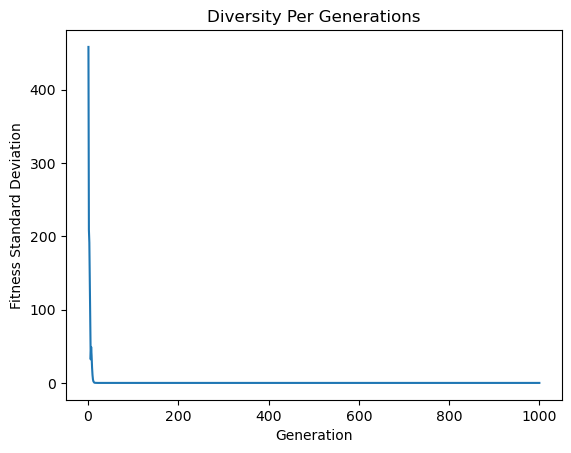

-----------------------------------------------------
this is run number:  10
solution fitness:  7.636543477929081e-05
solution fitness:  [420.9687560388429, 420.96873918565626, 420.9687583329428, 420.9687469486685, 420.9687450750798, 420.96874455774923]


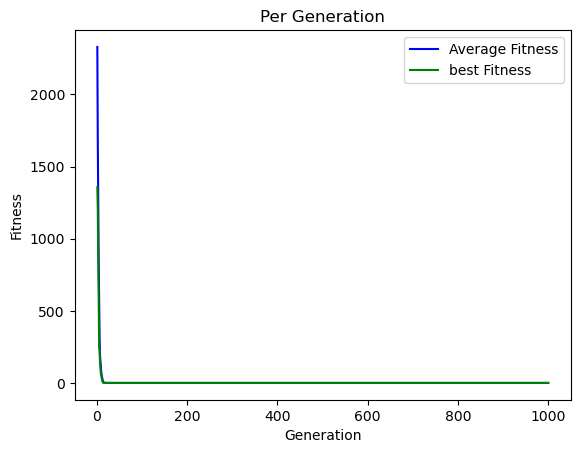

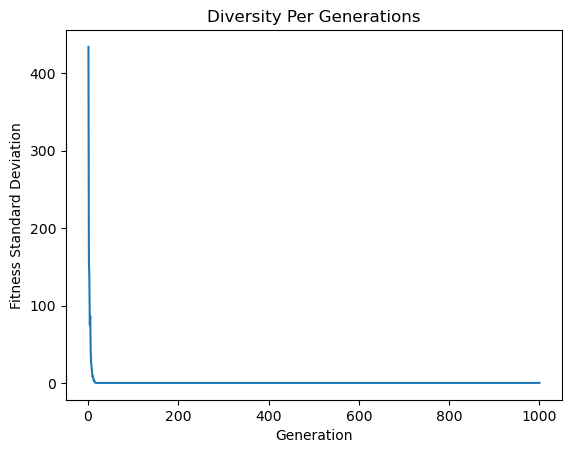

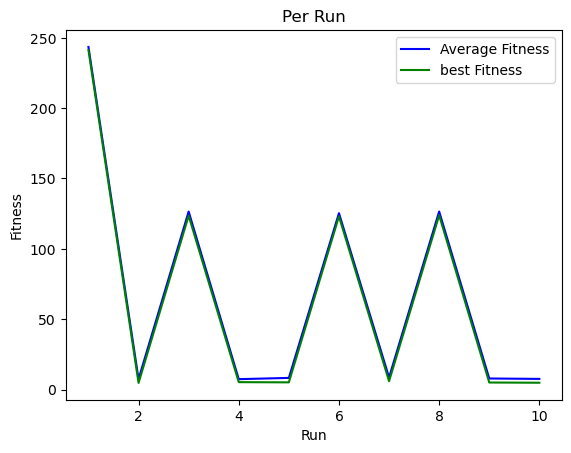

In [16]:
with open("configs/schwefel/generational_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

# self adaptive mutation is disabled

-----------------------------------------------------
this is run number:  1
solution fitness:  149.47444879157683
solution fitness:  [-300.20300337888557, 433.3607247589106, 424.93969350519984, 422.8042755538003, 426.394291886784, 427.19897919376785]


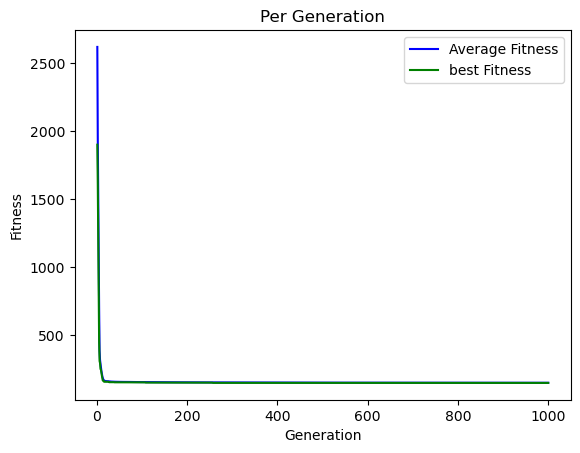

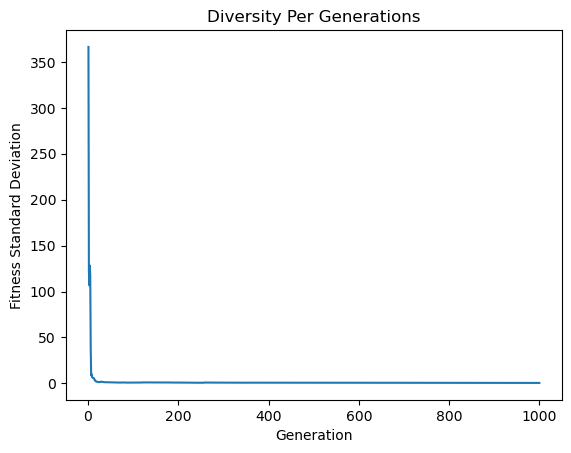

-----------------------------------------------------
this is run number:  2
solution fitness:  252.71313512735924
solution fitness:  [422.3854400074346, 431.4603309130061, 422.9735863421345, 421.97098421122826, -301.2997864570982, -299.872018360398]


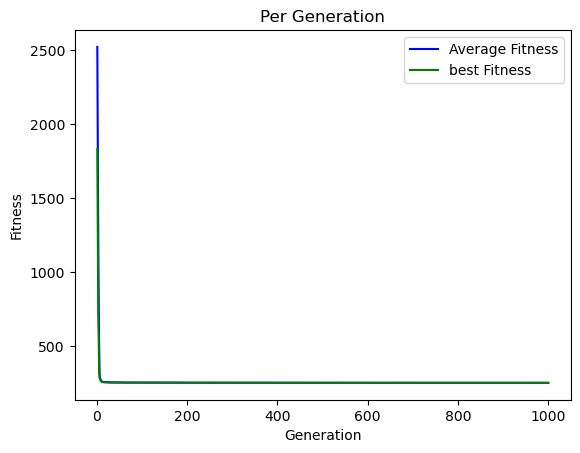

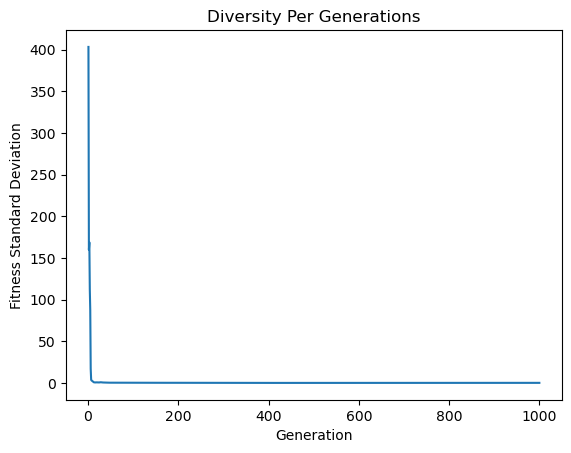

-----------------------------------------------------
this is run number:  3
solution fitness:  21.019176256456376
solution fitness:  [420.87945247097485, 422.3329570297174, 430.4012473028727, 428.3910281294439, 421.36606376647524, 425.5006464780218]


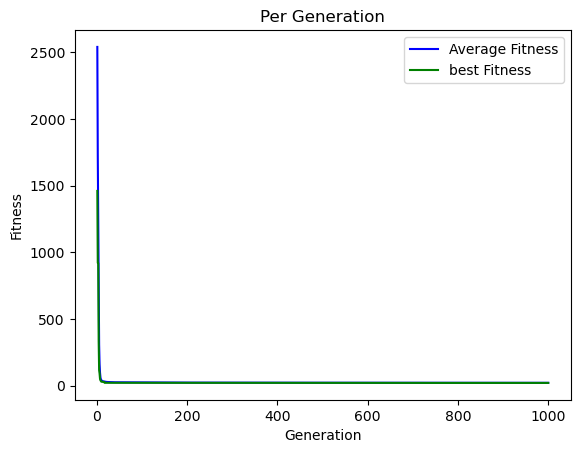

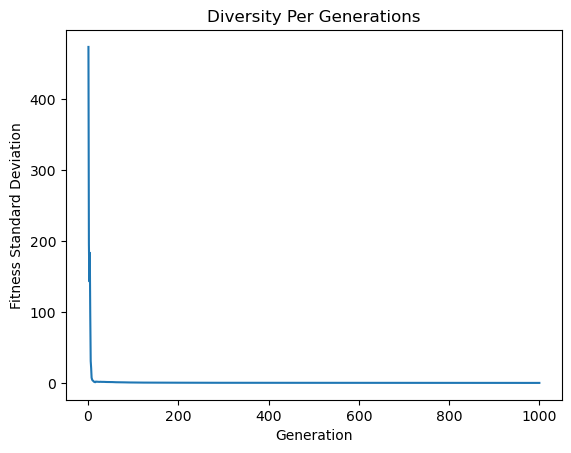

-----------------------------------------------------
this is run number:  4
solution fitness:  21.794037055768513
solution fitness:  [426.3544442039102, 423.93976167647617, 423.59962511866917, 430.266564477574, 426.2994357086894, 424.58876877450535]


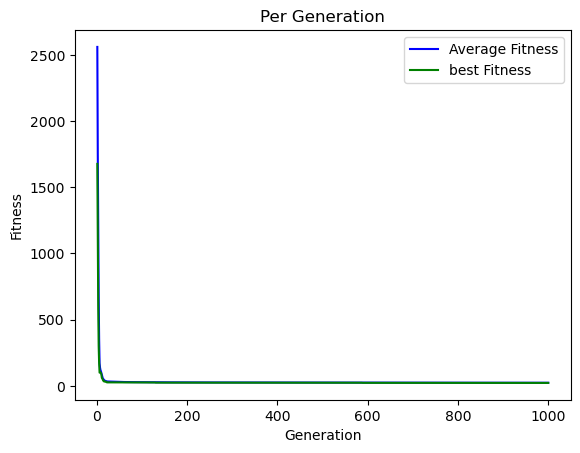

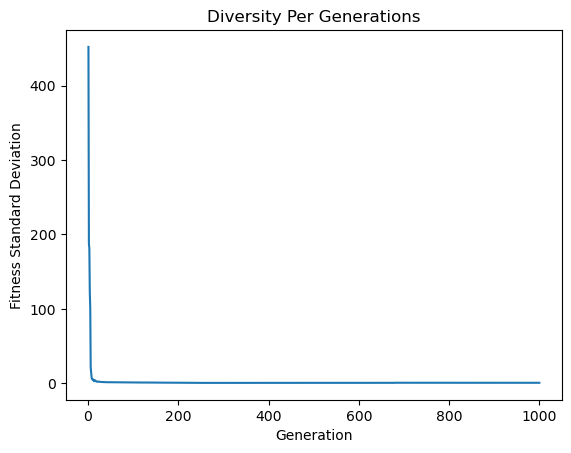

-----------------------------------------------------
this is run number:  5
solution fitness:  260.21647727483014
solution fitness:  [-289.25810448934885, 421.9489965761179, 424.22351722502793, -302.2800763768157, 420.6751806930736, 420.7540577892769]


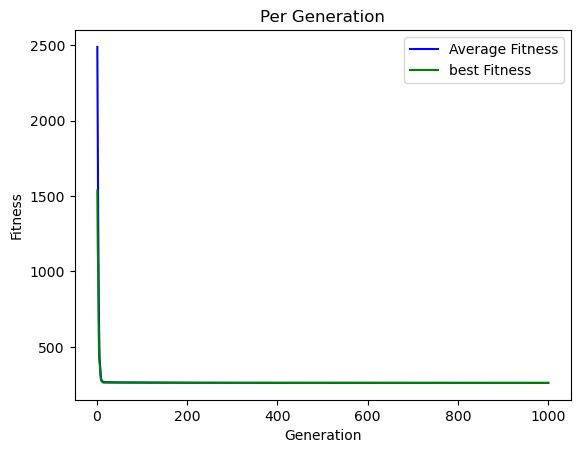

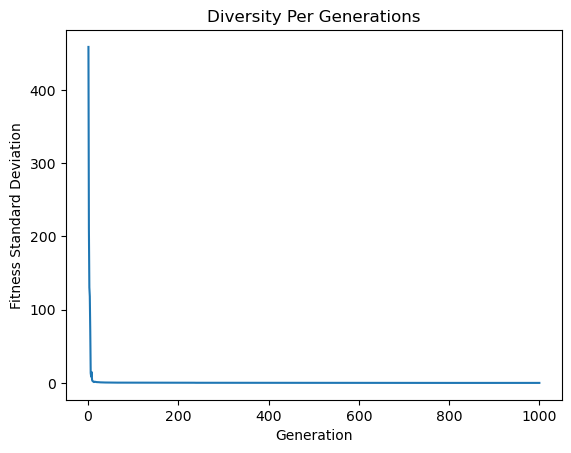

-----------------------------------------------------
this is run number:  6
solution fitness:  14.688776663221688
solution fitness:  [424.2668553850888, 427.8856311324139, 423.70053762499987, 422.8534787737026, 422.8713615819177, 427.52666686209756]


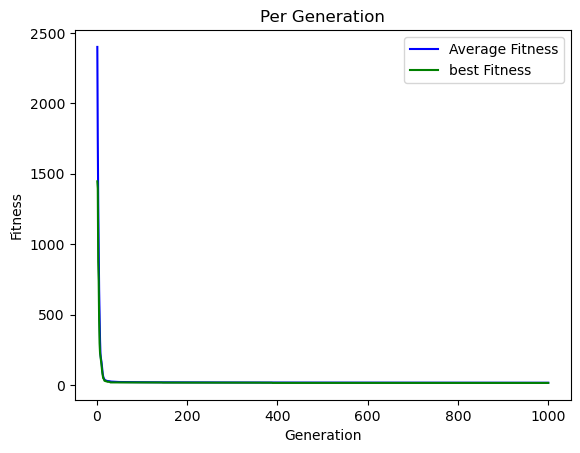

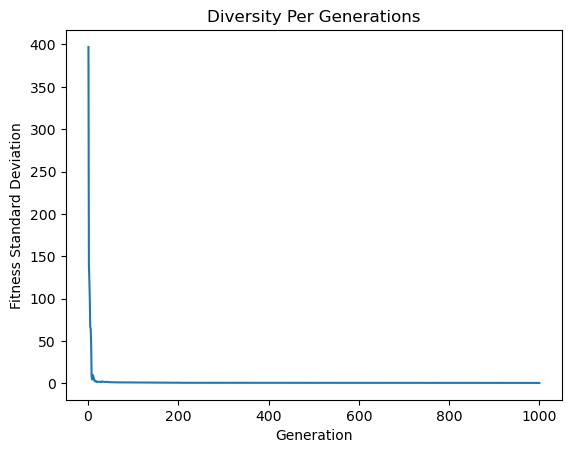

-----------------------------------------------------
this is run number:  7
solution fitness:  243.3661126235079
solution fitness:  [-296.1070832555778, 423.0603779968803, 443.24715167629756, 430.92883487019526, 438.1630283271506, 428.95591936253874]


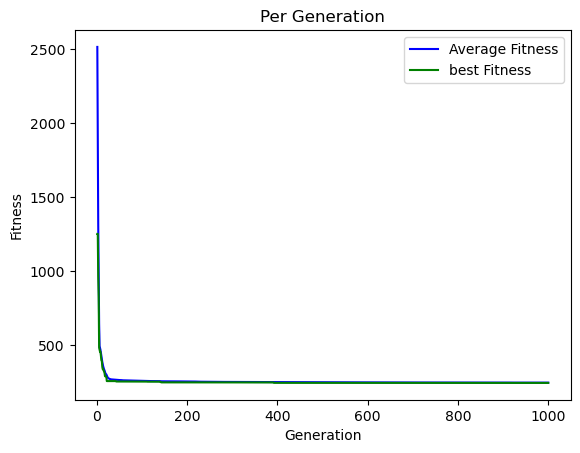

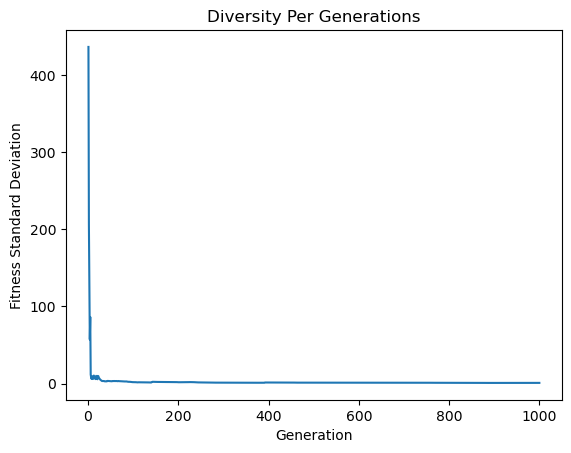

-----------------------------------------------------
this is run number:  8
solution fitness:  509.7053443806103
solution fitness:  [421.677166301508, 443.1872072890968, 428.37337999954207, 434.6572023081725, 205.084737658404, 462.2003141224675]


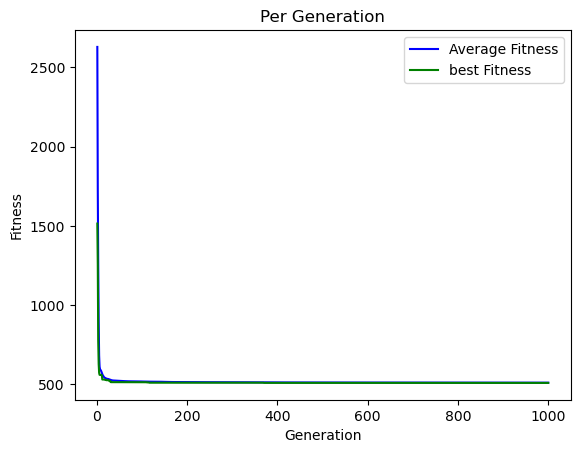

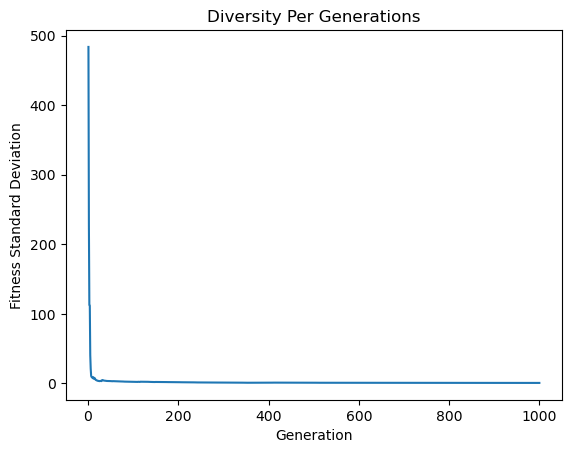

-----------------------------------------------------
this is run number:  9
solution fitness:  155.33706087505198
solution fitness:  [436.2902697831896, 423.4997839771946, 423.1182579194153, 440.06758108831195, 446.1872117851311, 422.8251654847006]


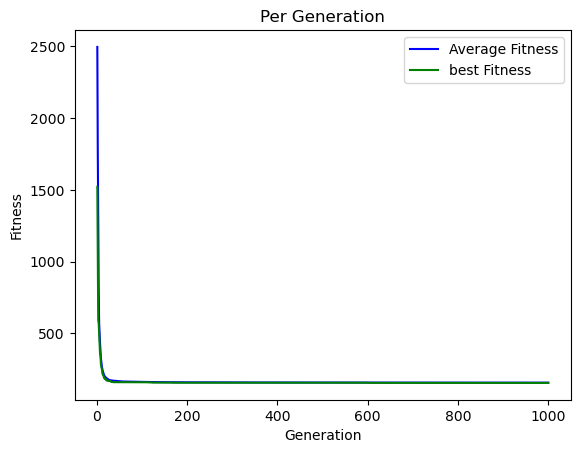

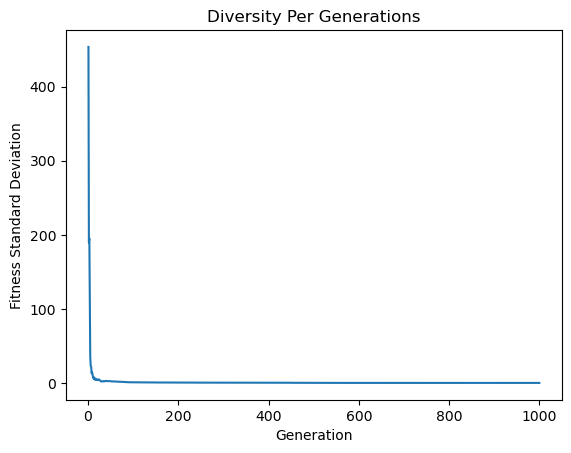

-----------------------------------------------------
this is run number:  10
solution fitness:  120.78963588972238
solution fitness:  [423.07890658370303, 429.99141987437764, 420.93172595719403, 433.46333609645905, 447.83289303993365, 424.45072803309904]


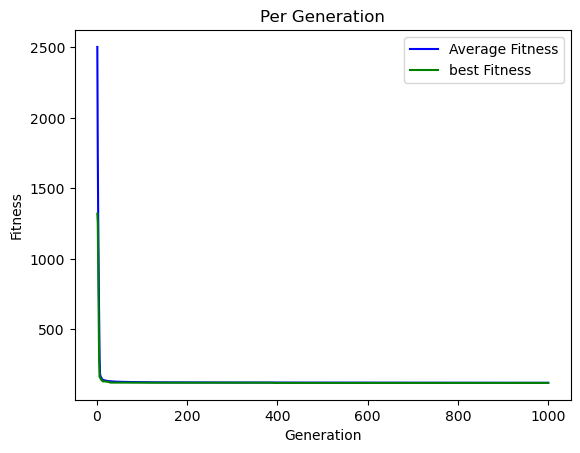

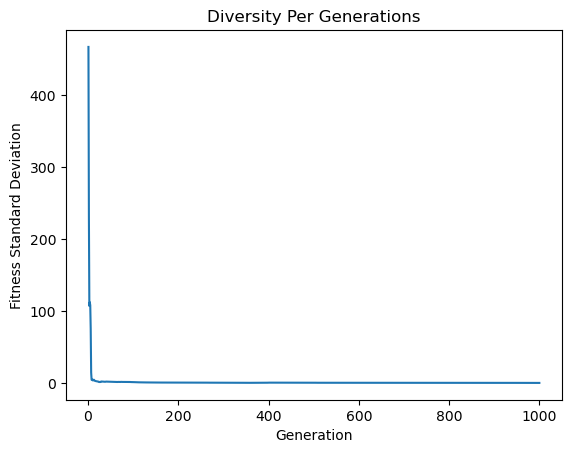

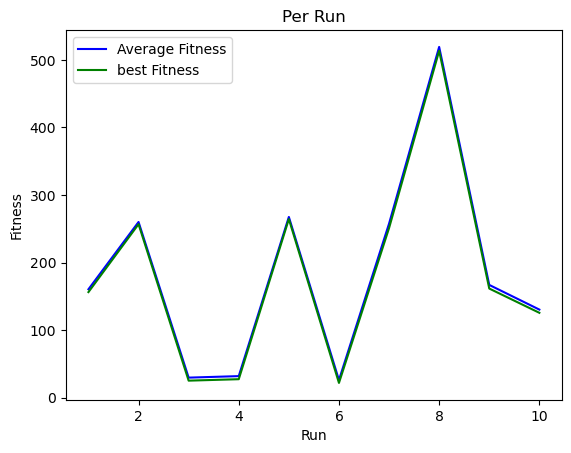

In [15]:
with open("configs/schwefel/non_adaptive_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

# results with different num_offsprings

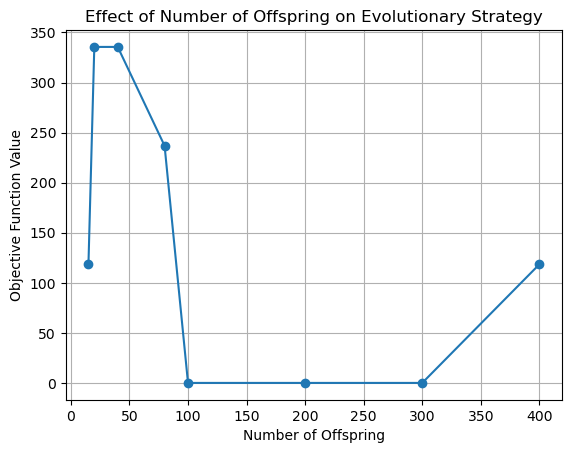

In [21]:
num_offspring_values = [15, 20, 40, 80, 100, 200,300, 400]
results = []

for num_offspring in num_offspring_values:
    json_string = '''
    {
      "evolutionary_strategy": {
        "survival_method": "elitism",
        "max_generations": 1000,
        "population_size": 30,
        "num_offspring": ''' + str(num_offspring) + ''',
        "initial_sigma": 0.75,
        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },
        "convergence_threshold": 1e-5,
        "no_improvement_threshold": 200,
        "sigma_threshold": 1e-5,
        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 6
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)
    
min_fitnesses = [result[0] for result in results]
plt.plot(num_offspring_values, min_fitnesses, marker='o')
plt.xlabel('Number of Offspring')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Offspring on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different initial_sigma

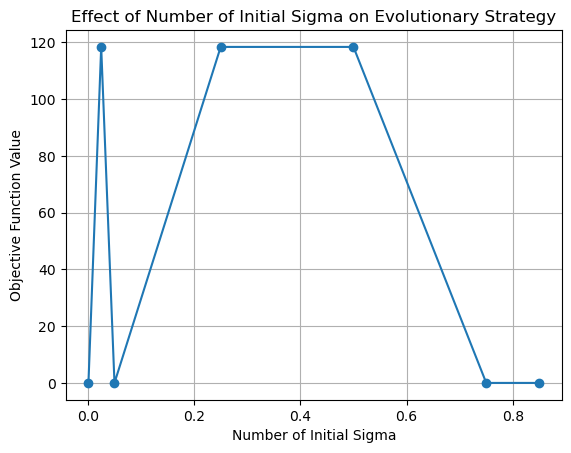

In [4]:
initial_sigma_values = [0.001, 0.025, 0.05, 0.25, 0.5,0.75, 0.85]
results = []
for initial_sigma in initial_sigma_values:
    json_string =  '''
    {
      "evolutionary_strategy": {
        "survival_method": "elitism",
        "max_generations": 1000,
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": ''' + str(initial_sigma) + ''',
        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },
        "convergence_threshold": 1e-5,
        "no_improvement_threshold": 200,
        "sigma_threshold": 1e-5,
        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 6
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)
min_fitnesses = [result[0] for result in results]
plt.plot(initial_sigma_values, min_fitnesses, marker='o')
plt.xlabel('Number of Initial Sigma')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Initial Sigma on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different max_generations

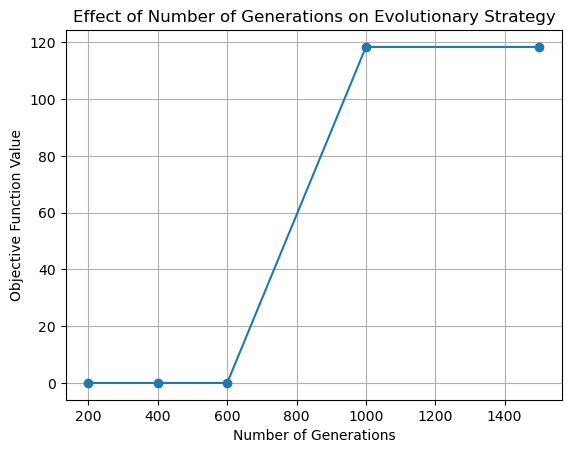

In [5]:
max_generations_values = [200, 400, 600, 1000, 1500]
results = []
for max_generations in max_generations_values:
    json_string = '''
    {
      "evolutionary_strategy": {
        "survival_method": "elitism",
        "max_generations":  ''' + str(max_generations) + ''',
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": 0.75,
        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },
        "convergence_threshold": 1e-5,
        "no_improvement_threshold": 200,
        "sigma_threshold": 1e-5,
        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 6
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)
min_fitnesses = [result[0] for result in results]
plt.plot(max_generations_values, min_fitnesses, marker='o')
plt.xlabel('Number of Generations')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Generations on Evolutionary Strategy')
plt.grid(True)
plt.show()